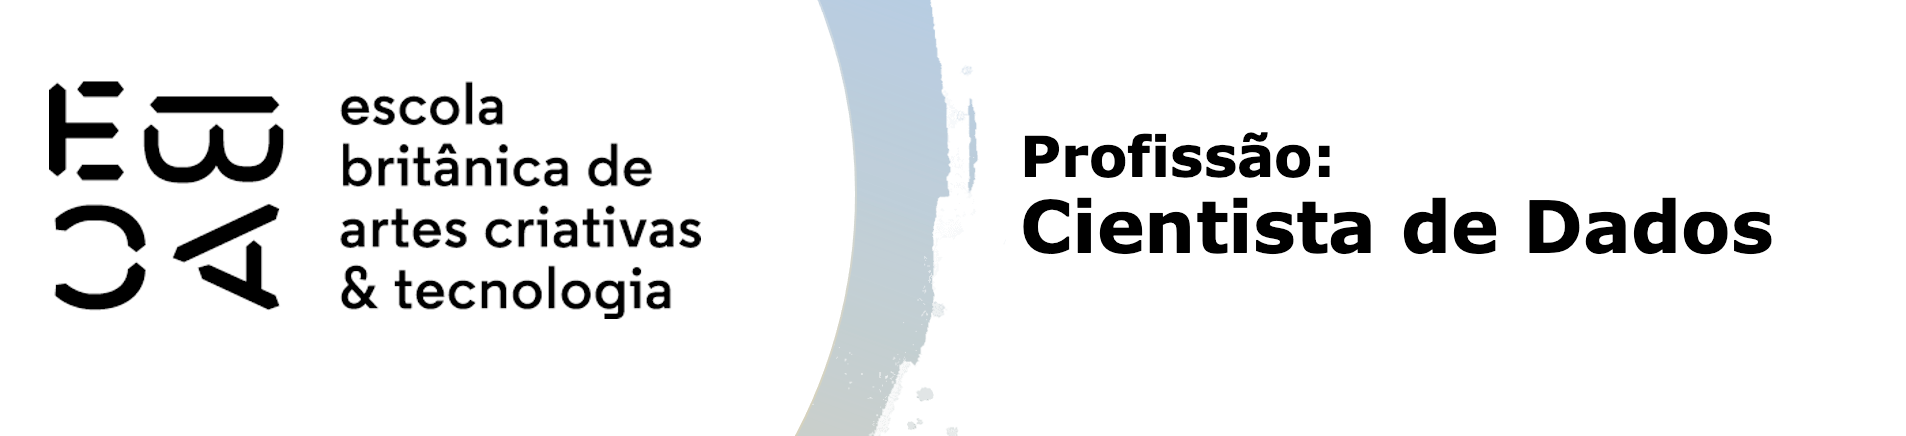

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [430]:
df = pd.read_csv('online_shoppers_intention.csv')

In [431]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [432]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

In [433]:
df[variaveis]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000
...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667
12326,0,0.0,0,0.0,5,465.750000
12327,0,0.0,0,0.0,6,184.250000
12328,4,75.0,0,0.0,15,346.000000


## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [434]:
# Informação dos dados:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [435]:
# número de valores únicos de cada variável:

df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

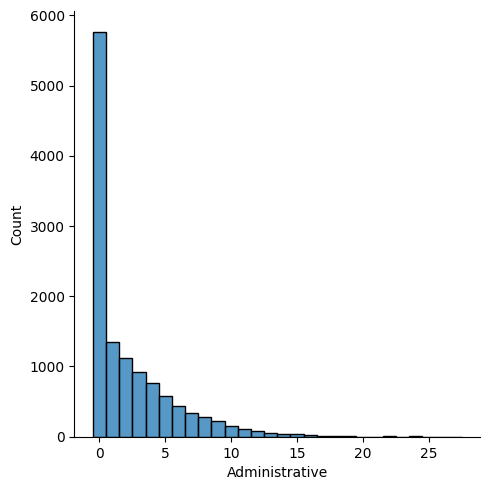

In [436]:
# distribuição da variável 'Administrative' com o histograma:

sns.displot(data=df, x = "Administrative", discrete=True)
plt.show()

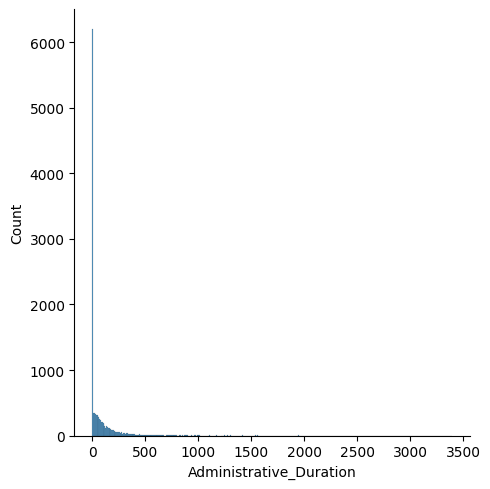

In [437]:
# distribuição da variável Administrative_Duration com o histograma:

sns.displot(data=df, x = "Administrative_Duration")
plt.show()

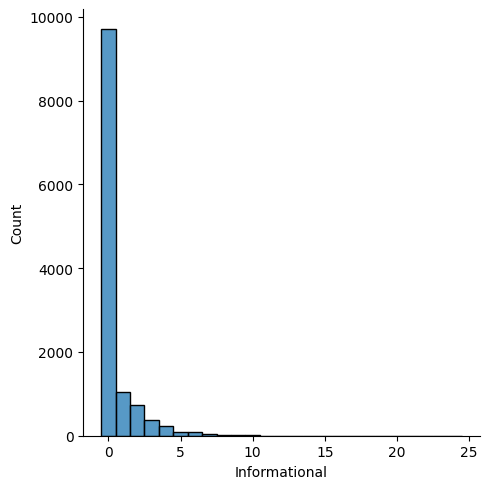

In [438]:
# distribuição da variável Informational com o histograma

sns.displot(data=df, x = "Informational", discrete=True)
plt.show()

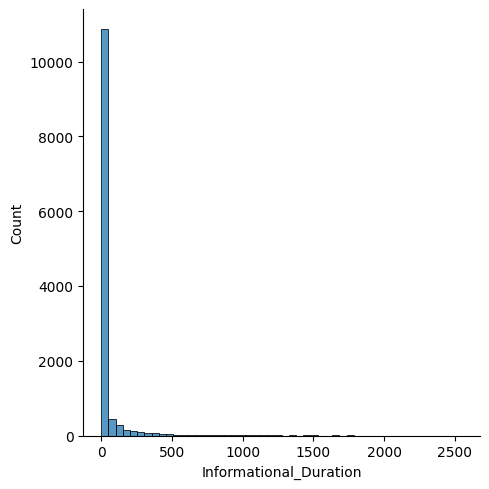

In [439]:
# distribuição da variável Informational_Duration com o histograma:

sns.displot(data=df, x = "Informational_Duration", bins=50)
plt.show()

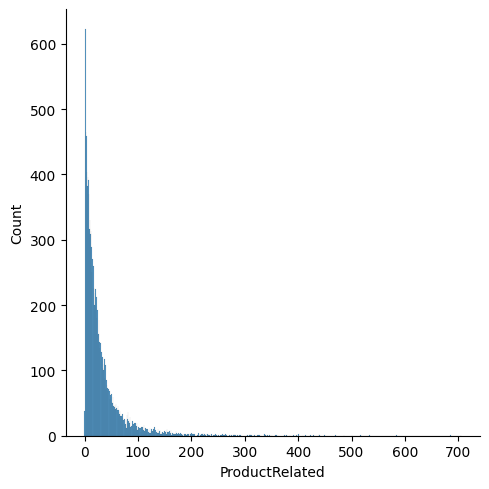

In [440]:
# distribuição da variável ProductRelated com o histograma:

sns.displot(data=df, x = "ProductRelated", discrete=True)
plt.show()

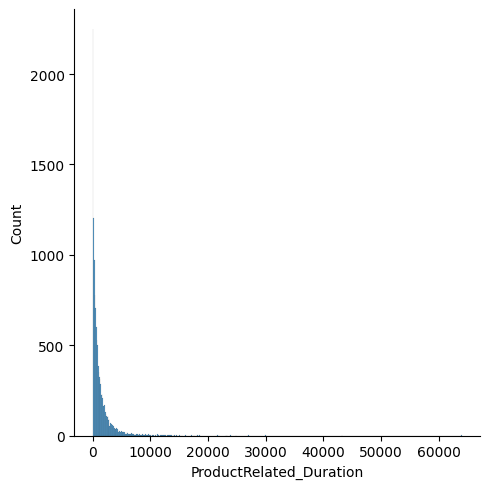

In [441]:
# distribuição da variável ProductRelated_Duration com o histograma:

sns.displot(data=df, x = "ProductRelated_Duration")
plt.show()

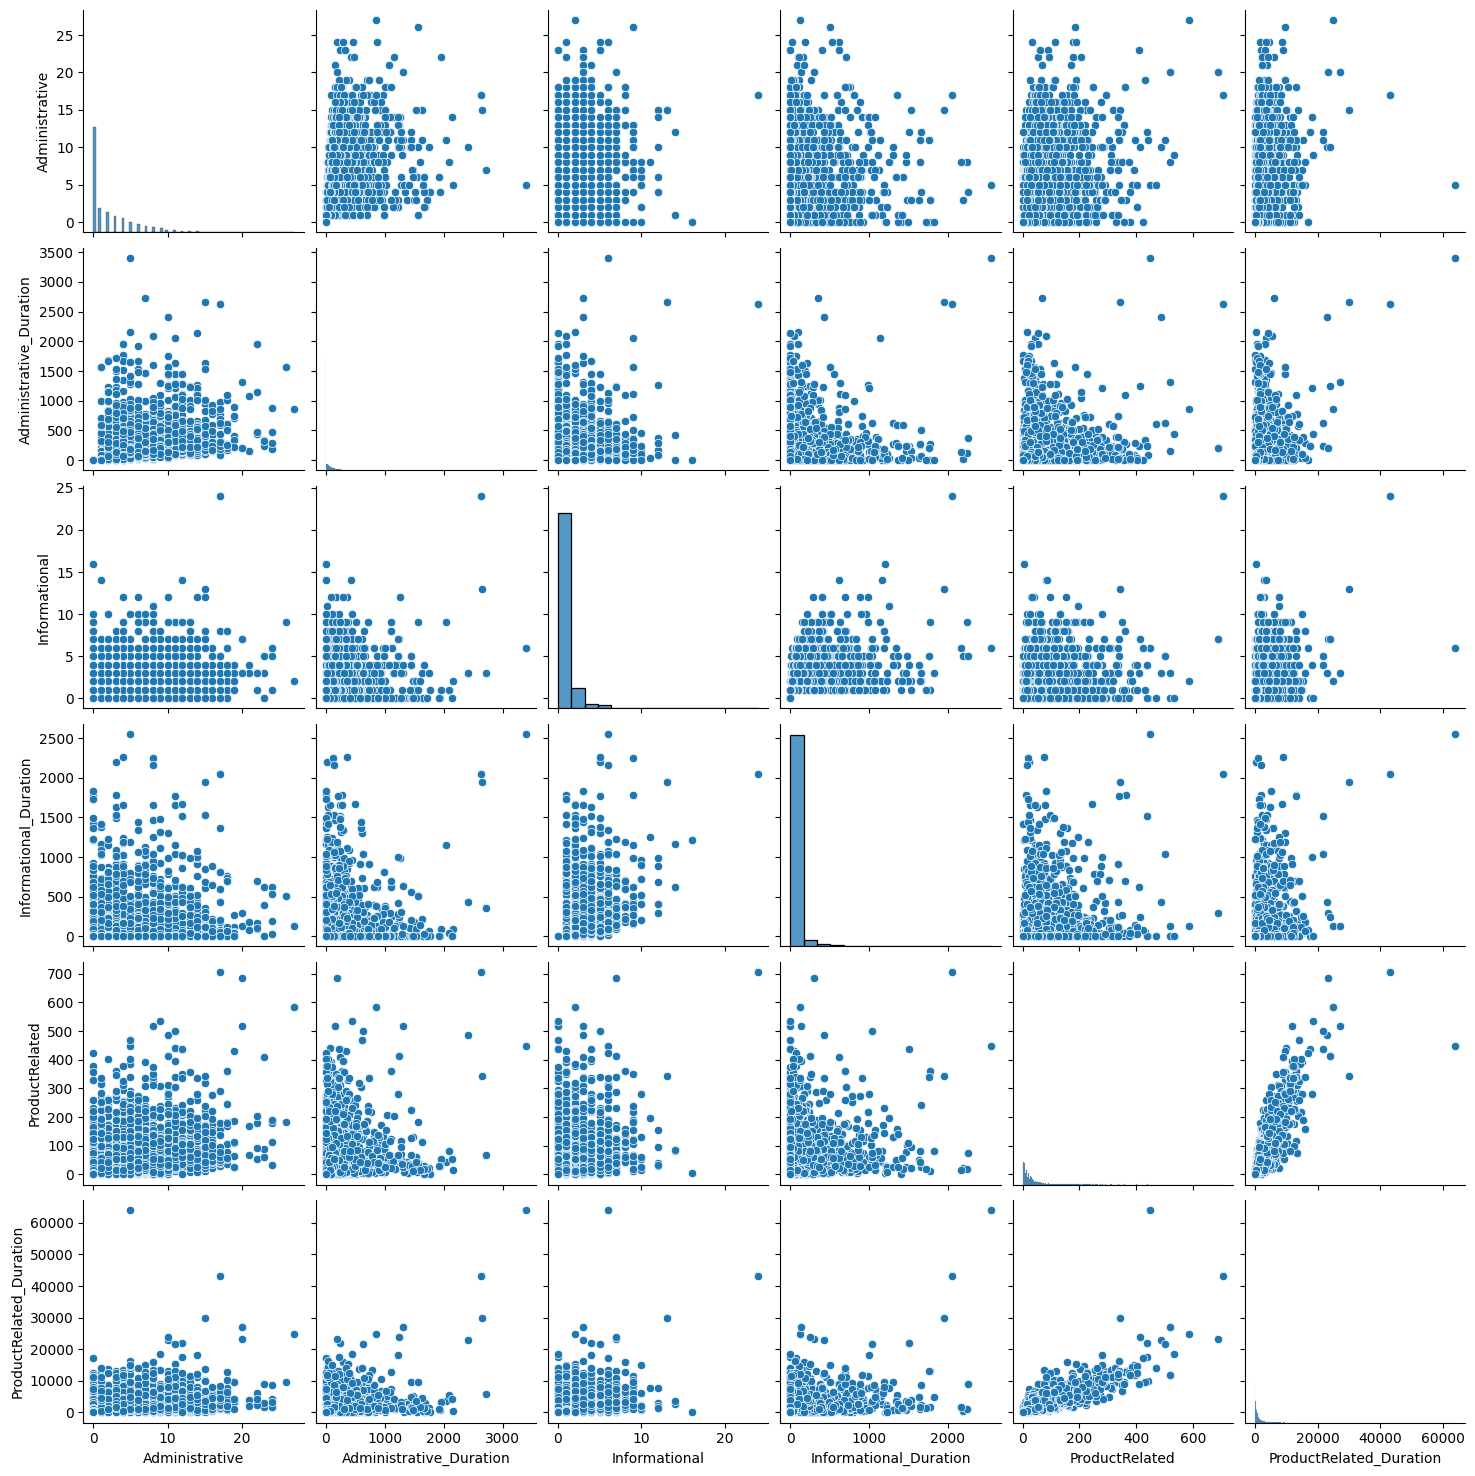

In [442]:
# verificando a distribuição das variáveis:

sns.pairplot(df[variaveis])

In [443]:
# verificando se há missings:

df[variaveis].isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

In [444]:
# deixando apenas as variaveis numericas:

df_quant = df.select_dtypes(include="number")
df_quant.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1


In [445]:
# padronizando as variáveis:

padronizador = StandardScaler()
df_padronizado = padronizador.fit_transform(df_quant)

In [446]:
# transformando  o ndarray em dataframe, renomeando as colunas para o original:

df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = df_quant.columns
df_padronizado

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,2.058618,2.121412,-0.894178,-0.762629
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,0.976499
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,2.218733
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,-0.136078,-0.207952,-0.061364,1.721839


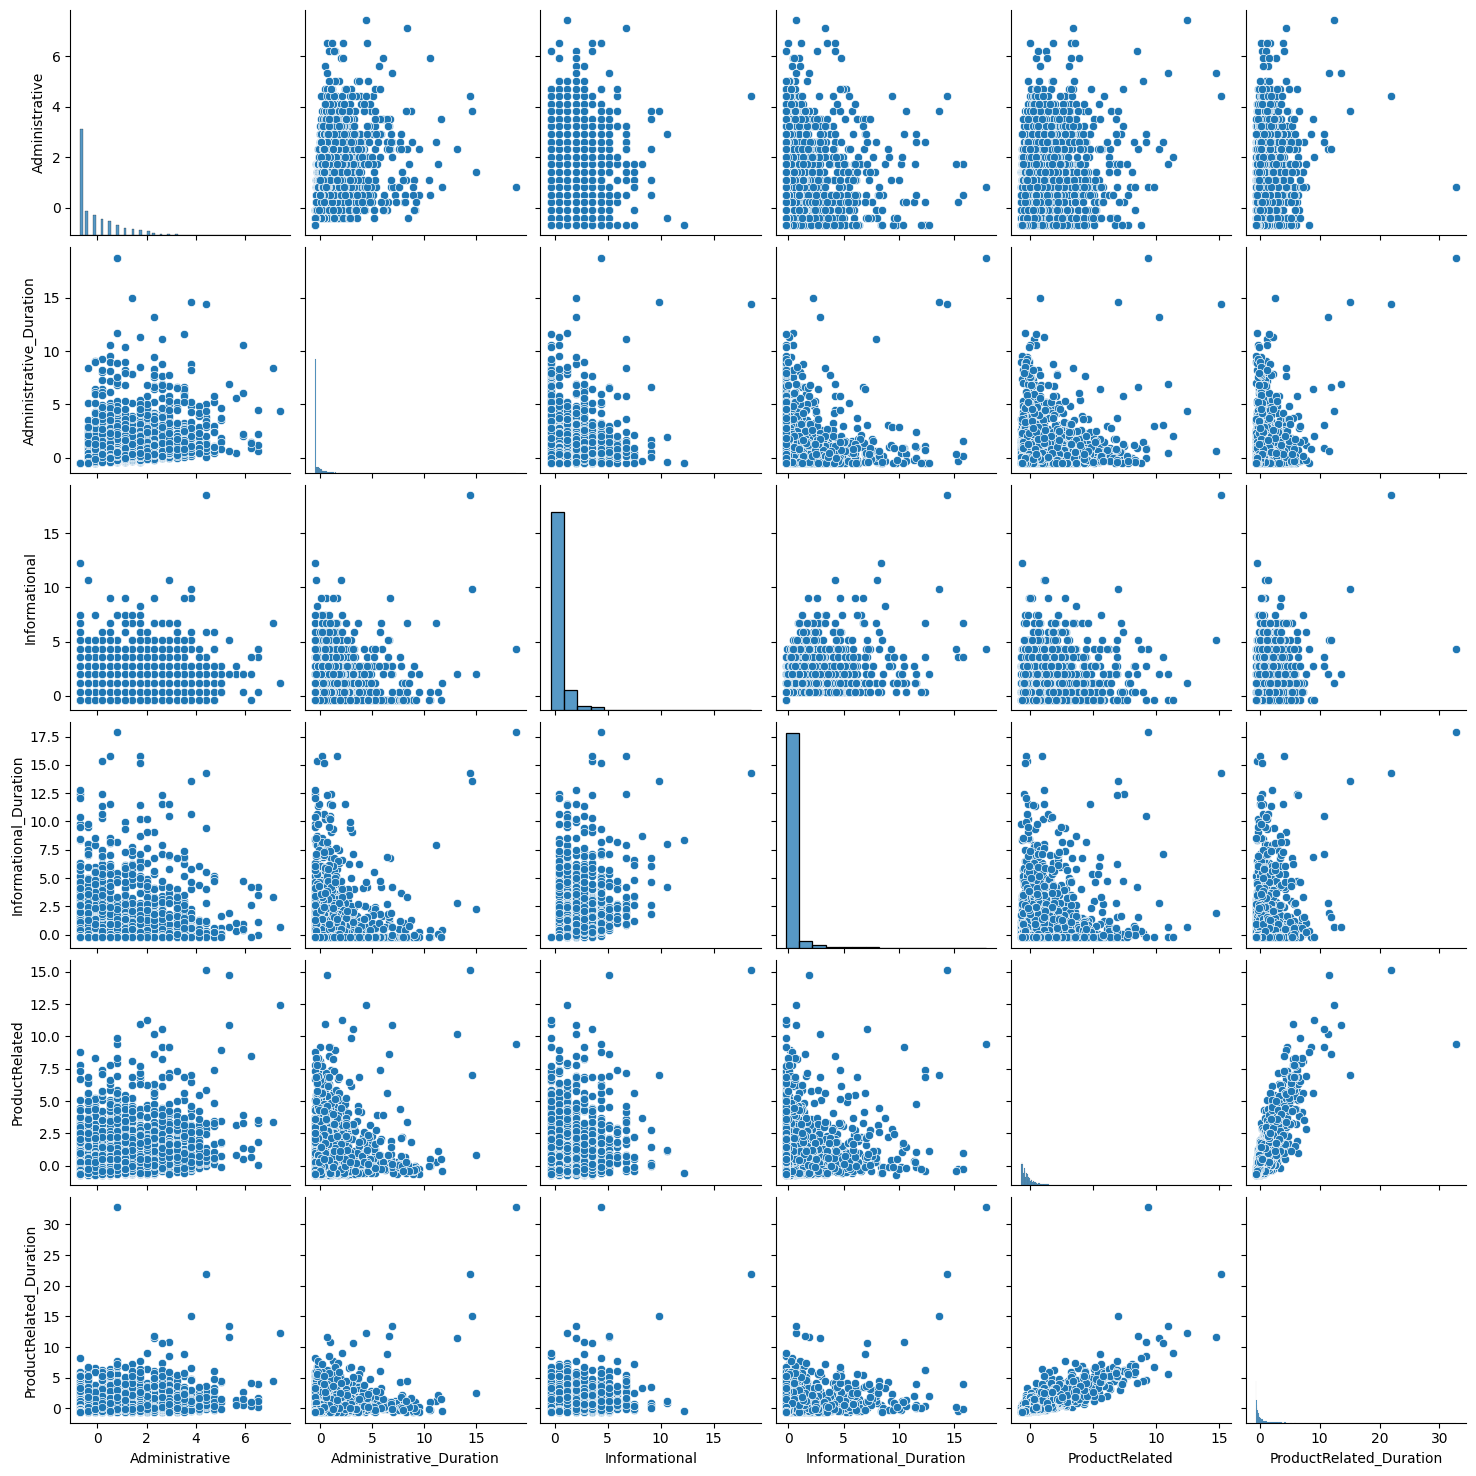

In [447]:
# verificando a distribuição das variáveis normalizadas:

sns.pairplot(df_padronizado[variaveis])

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [448]:
# método do cotovelo:

SQD = []
K = range(1, 15)

for k in tqdm(K):
    km = KMeans(n_clusters = k)
    km = km.fit(df_padronizado[variaveis])
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

In [449]:
SQD

[73980.00000000003,
 51211.61385065657,
 43201.87923350917,
 37464.139172464544,
 33469.18900918683,
 30064.104792577557,
 26905.449176795795,
 25210.017920484792,
 22499.42017276528,
 21132.622536107596,
 19995.480621482136,
 18983.31479732906,
 18304.357451704305,
 17451.94697634733]

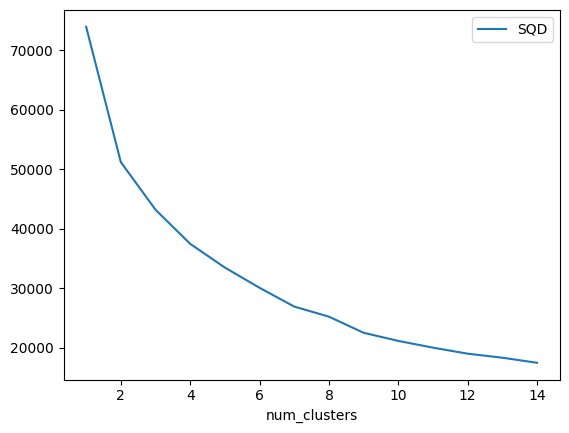

In [450]:
cot = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
cot.plot(x = 'num_clusters', y = 'SQD');

# identifiquei 2 como número de clusters com o método do cotovelo;

In [451]:
# método da silhueta:

# Inicializar uma lista vazia que vai conter os valores da silueta média
silhuetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 15

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(df_padronizado[variaveis])
    # Aqui calculamos a silhueta e guardamos o resultado na lista 'silhuetas'
    silhuetas.append(silhouette_score(df_padronizado[variaveis], km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    df_padronizado['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/14 [00:00<?, ?it/s]

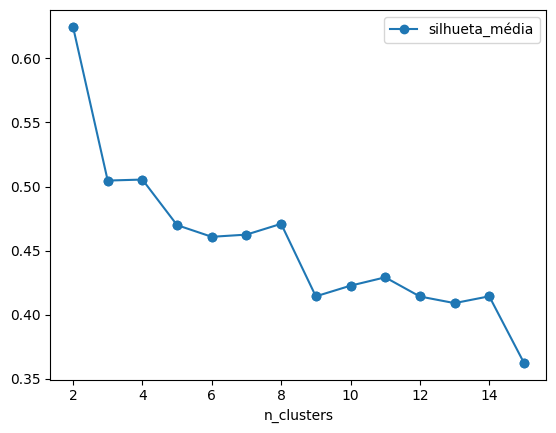

In [452]:
df_silhueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silhueta_média': silhuetas})

df_silhueta.plot.line(x = 'n_clusters', y = 'silhueta_média', marker='o')
plt.scatter(x = df_silhueta.n_clusters, y = df_silhueta.silhueta_média)

# identifiquei 2 como número de clusters com o método da silhueta.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [453]:
## rodando o KMeans para 2 clusters:
#
#cluster_2 = KMeans(n_clusters=2)
#cluster_2.fit_predict(df_padronizado[variaveis])
#
## adicionando uma coluna no dataframe df_pad com o agrupamento construido:
#
#df_padronizado['grupos_2'] = pd.Categorical(cluster_2.labels_)

In [454]:
df_padronizado[variaveis]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430
...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536


In [455]:
variaveis = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration', 
 'grupos_2']

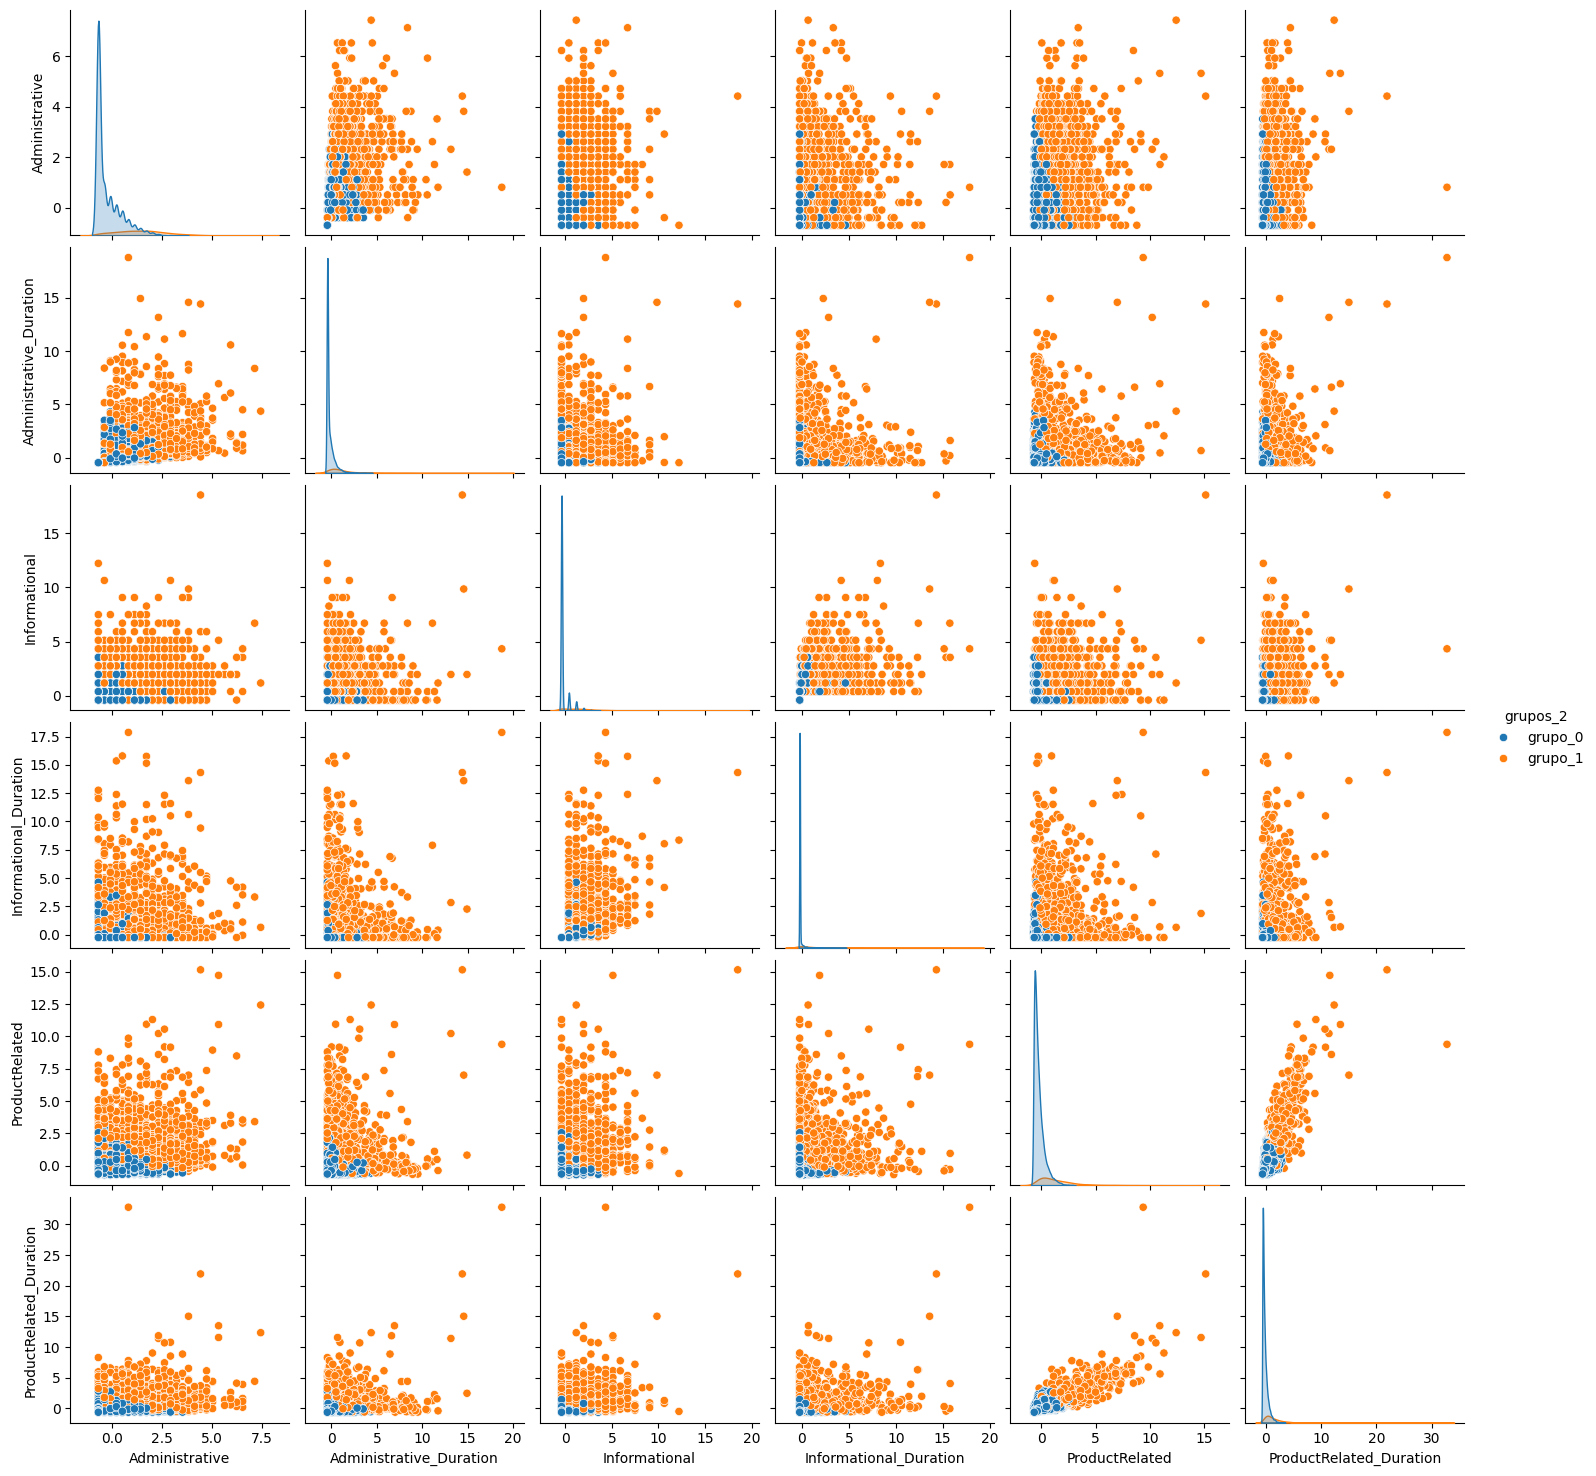

In [456]:
# plotando o resultado com 2 clusters:

sns.pairplot(df_padronizado[variaveis], hue='grupos_2')
plt.show()

In [457]:
variaveis = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration', 
 'grupos_3']

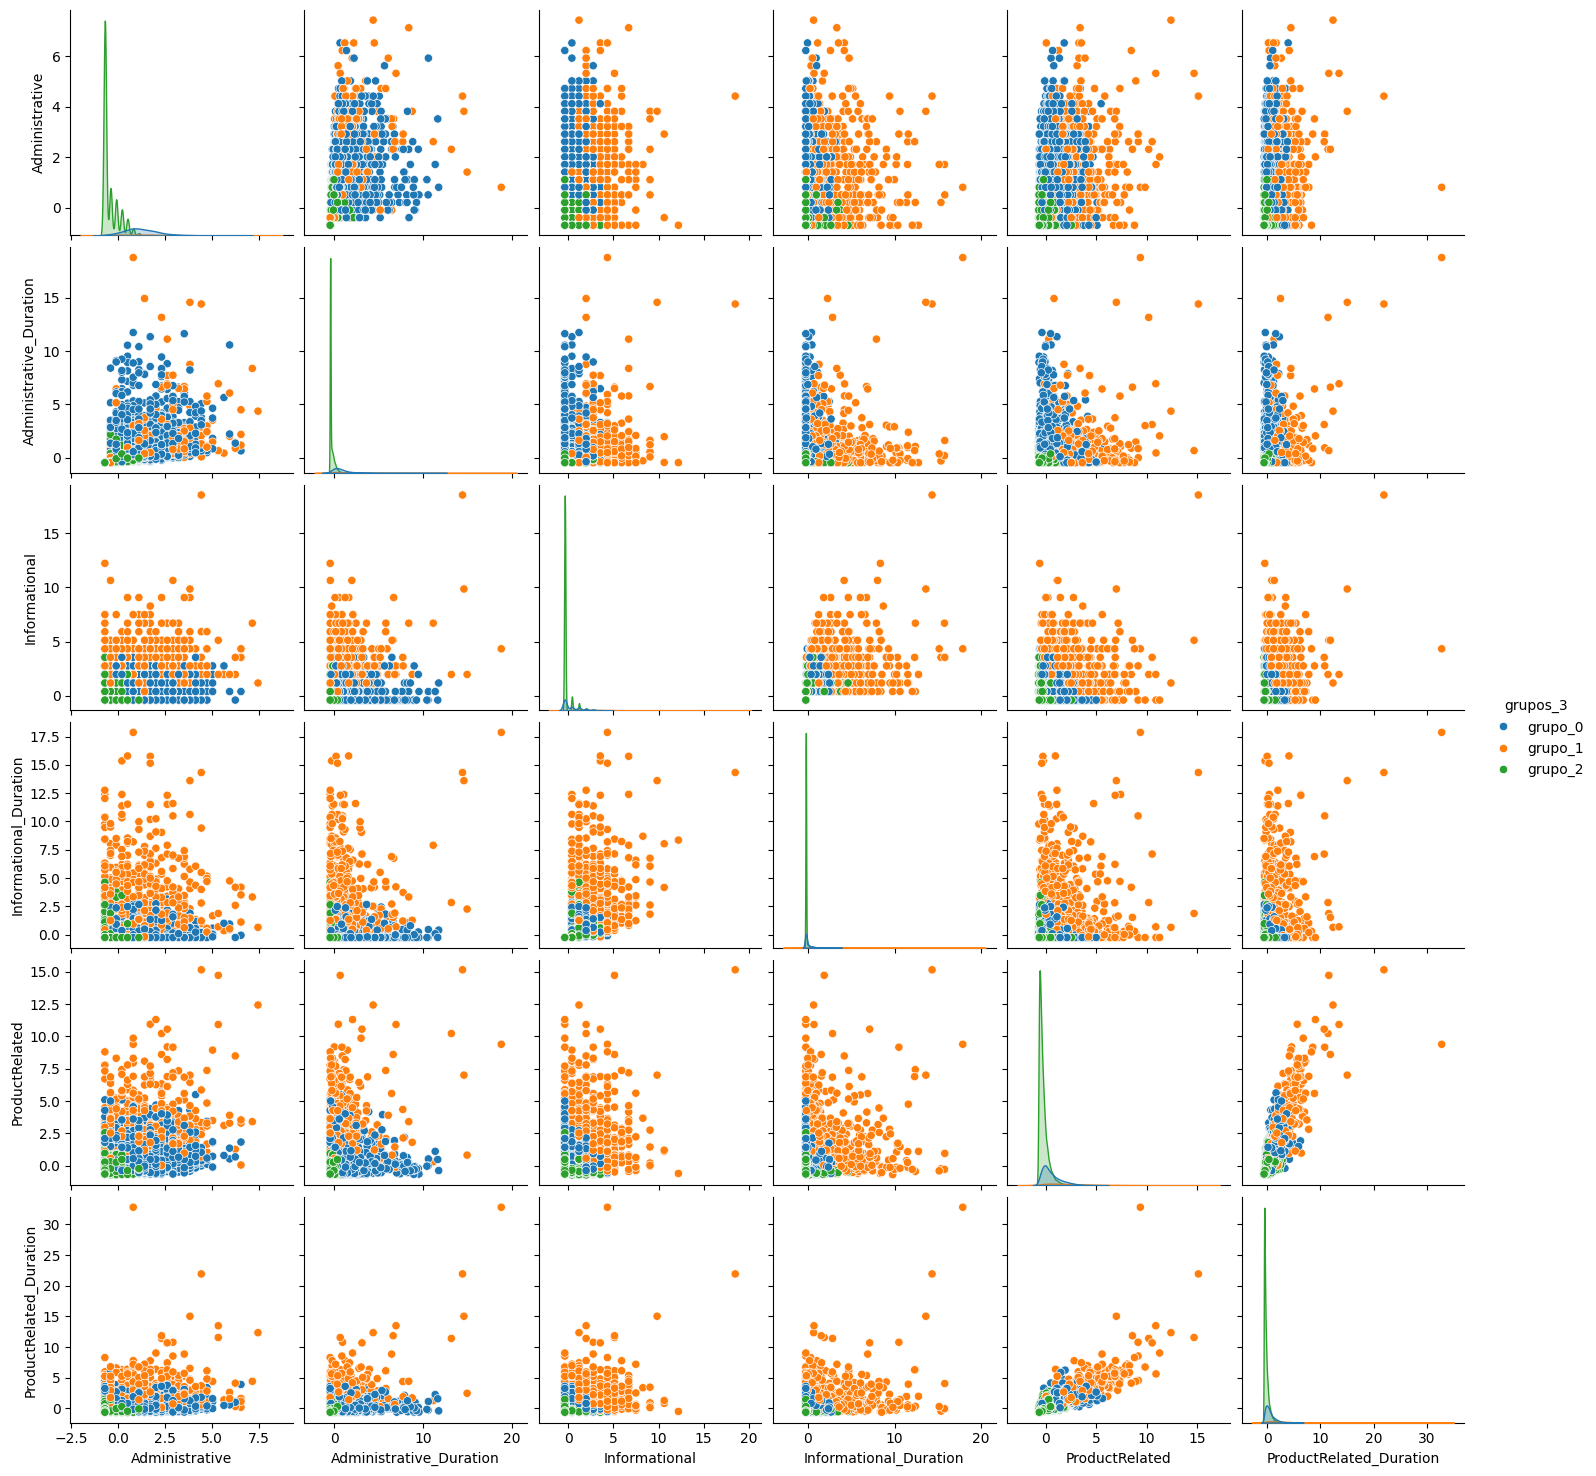

In [458]:
# plotando o resultado com 3 clusters:

sns.pairplot(df_padronizado[variaveis], hue='grupos_3')
plt.show()

In [459]:
variaveis = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration', 
 'grupos_4']

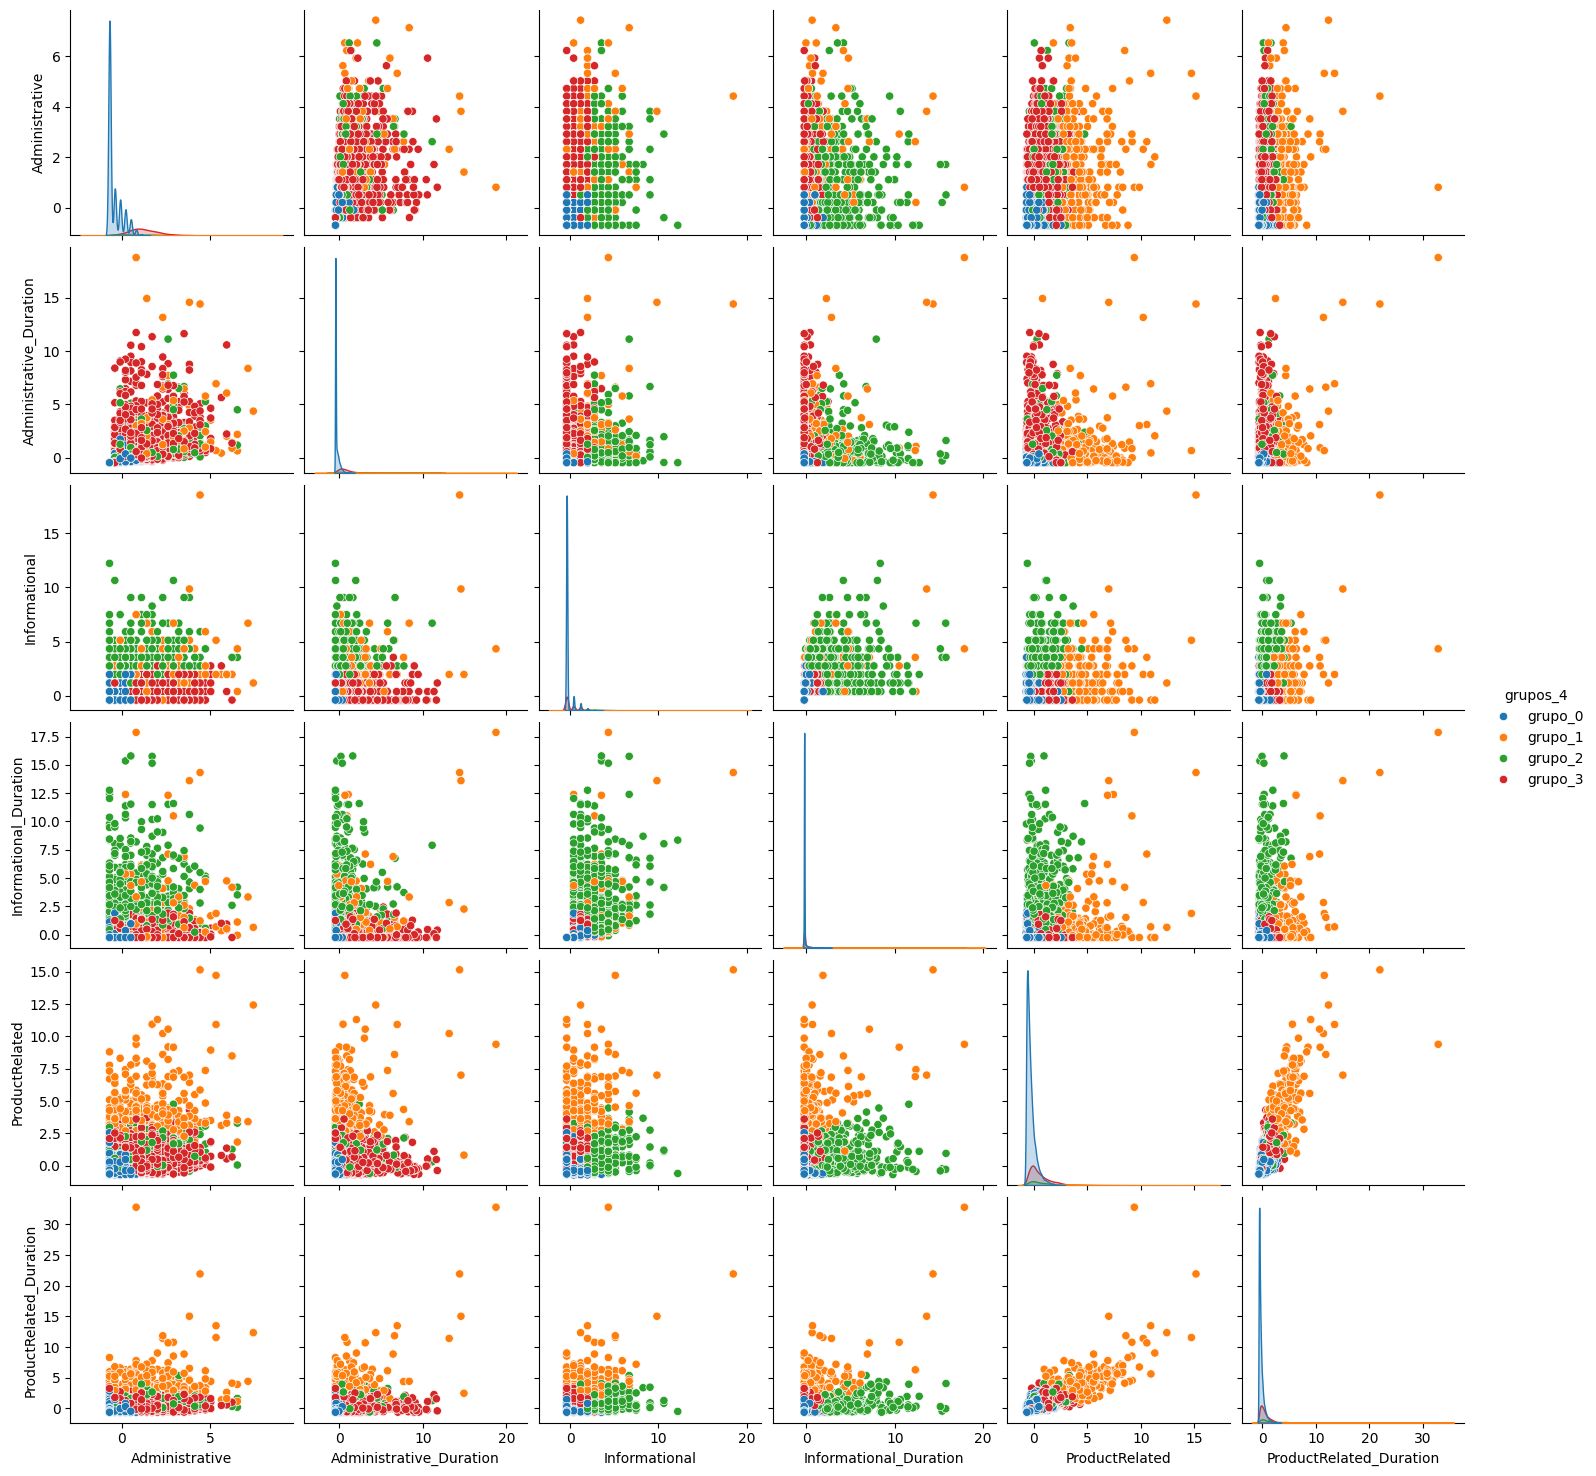

In [460]:
# plotando o resultado com 4 clusters:

sns.pairplot(df_padronizado[variaveis], hue='grupos_4')
plt.show()

#### Podemos sugerir os nomes das categorias nos baseando nas preferências de navegação dos grupos:
##### - pref_adm 
##### - pref_products
##### - pref_baixo_acesso
##### - pref_info

In [471]:
# renomeando os grupos:

df_padronizado['grupos_4'].replace({'grupo_0':"baixo_acesso", 'grupo_2':"pref_info", 'grupo_3':"pref_adm", 'grupo_1':"pref_products"}, inplace=True)

C:\Users\alext\AppData\Local\Temp\ipykernel_31972\2029009855.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_padronizado['grupos_4'].replace({'grupo_0':"baixo_acesso", 'grupo_2':"pref_info", 'grupo_3':"pref_adm", 'grupo_1':"pref_products"}, inplace=True)


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [472]:
# acrescentando coluna BounceRates e Revenue ao DataFrame padronizado:

df_padronizado['BounceRates'] = df['BounceRates']
df_padronizado['Revenue'] = df['Revenue']

<Axes: xlabel='BounceRates', ylabel='grupos_4'>

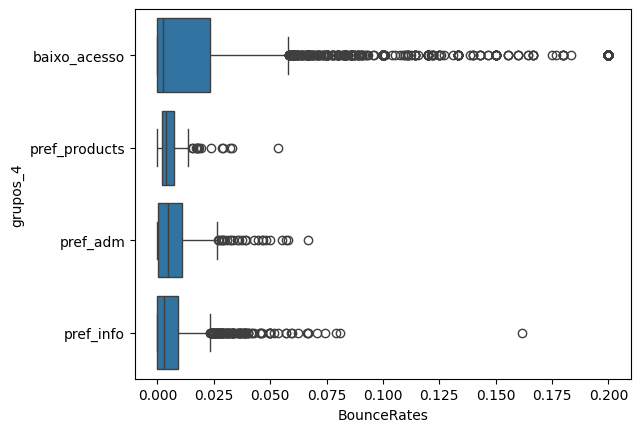

In [473]:
# plotando a variável BounceRates em relação ao grupo 4:

sns.boxplot(data=df_padronizado, y='grupos_4', x='BounceRates')

In [474]:
# tabela cruzada entre Revenue e grupos_4

pd.crosstab(df_padronizado.Revenue, df_padronizado.grupos_4)

grupos_4,baixo_acesso,pref_products,pref_adm,pref_info
Revenue,,,,
False,8055,168,421,1778
True,1144,87,154,523


In [475]:
# porcentagem de compra por categoria:

pd.crosstab(df_padronizado.Revenue, df_padronizado.grupos_4, normalize = 'columns')

grupos_4,baixo_acesso,pref_products,pref_adm,pref_info
Revenue,,,,
False,0.875639,0.658824,0.732174,0.772708
True,0.124361,0.341176,0.267826,0.227292


 - O conjunto com maior probabilidade de realizar compras é o grupo 1, intitulado pref_products, devido a sua baixa taxa de rejeição de visitas (BounceRates) e maior taxa de compras (Revenue).